7th Homework

Exercise 5

In [21]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

Dataset = sio.loadmat('Dataset.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']

3.6282404668569606
10.99639171954666
0.34386394046010244


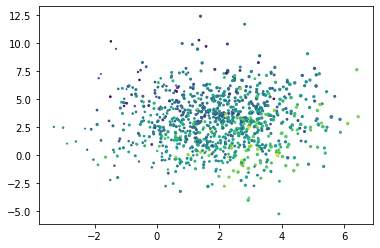

In [22]:
x1mean=np.mean(X1,axis=0)

distance1=np.zeros((len(X1),4))
for i in range(len(X1)):
    for j in range(len(x1mean)):
        distance1[i,j]=(X1[i,j]-x1mean[j])**2
        
distance=np.zeros(len(X1))
for i in range(len(X1)):
    distance[i]=(distance1[i,0]+distance1[i,1]+distance1[i,2]+distance1[i,3])**(1/2)                                                                            
                                                                                
print(np.mean(distance))                                                                                                                                                             
print(np.max(distance))
print(np.min(distance))
plt.scatter(X1[:,0],X1[:,1],X1[:,2],X1[:,3])

For the dataset X1, we observe from the scatter plot that each one of of the dimension of a point of X1 may follow a normal distribution. Also, After calculating the distance of each point of X1 of the mean of dataset X1, we observe from the minimum distance and the maximum distance that each point is spread almost equally from the mean. The minimum distance is 0.34 the maximum is 10.99 and the mean is 3.62. Hence, there are points that are not only far from the mean but also really close to the mean, so they are spread smoothly. These evidence point that the distribution is normal.

a) Parametric approach

For X1

In [23]:
import scipy.stats


cov=(1/len(X1))*np.dot((X1-x1mean).T,(X1-x1mean))

x1test=np.array([[2.01,2.99,3.98,5.02],[20.78,-15.26,19.38,-25.02],[3.08,3.88,4.15,6.02]])

pdf1 =scipy.stats.multivariate_normal.pdf(x1test,x1mean,cov)
print(pdf1)

[3.37904075e-003 1.28615624e-206 1.95207559e-003]


The same values can also be calculated by using the Gaussian Mixture for 1 component. Below, there are these calculations.

In [24]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=1).fit(X1)
loglik= gm.score_samples(x1test)
pdf11=np.exp(loglik)
print(pdf11)

[3.37903694e-003 1.28655830e-206 1.95207408e-003]


C:\Users\sotir\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


For X2

18.74250513335845
12.397966619553708
25.095470662001663


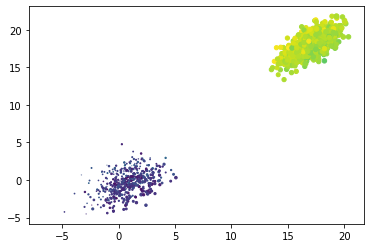

In [28]:
x2mean=np.mean(X2,axis=0)

distance2=np.zeros((len(X2),4))
for i in range(len(X2)):
    for j in range(len(x2mean)):
        distance2[i,j]=(X2[i,j]-x2mean[j])**2

distance=np.zeros(len(X2))
for i in range(len(X2)):
    distance[i]=(distance2[i,0]+distance2[i,1]+distance2[i,2]+distance2[i,3])**(1/2)

print(np.mean(distance))                                   
print(np.min(distance))
print(np.max(distance))
plt.scatter(X2[:,0],X2[:,1],X2[:,2],X2[:,3])
plt.show()

For the dataset X2, we observe from the scatter plot that each one of of the dimension of a point of X2 do not follow a normal distribution. It seems that points follow two seperate normal distributions. The distribution seems to be bimodal. Also, After calculating the distance of each point of X2 of the mean of dataset X2, we observe from the minimum distance and the maximum distance that each point is not spread equally from the mean. The minimum distance is 12.39 the maximum is 25.09 and the mean is 18.74. Hence, the points are far from the mean and distributed far from it. These evidence point that the distribution is bimodal.

In [30]:
x2test=np.array([[0.05, 0.15,-0.12,-0.08],[7.18, 7.98,9.12,9.94],[3.48,4.01,4.55,4.96],[20.78,-15.26,19.38,-25.02]])

gm = GaussianMixture(n_components=2).fit(X2)

pdf21=scipy.stats.multivariate_normal.pdf(x2test,gm.means_[0].reshape(4,),gm.covariances_[0].reshape(4,4))
pdf22=scipy.stats.multivariate_normal.pdf(x2test,gm.means_[1].reshape(4,),gm.covariances_[1].reshape(4,4))

pdf2=pdf21*gm.predict_proba(x2test)[:,0]+pdf22*gm.predict_proba(x2test)[:,1]

print(pdf2)

[3.15662190e-003 3.60977861e-024 1.73852361e-008 4.12068372e-102]


Or else calculated similarly:

In [31]:
gm = GaussianMixture(n_components=2).fit(X2)
loglik= gm.score_samples(x2test)
pdf2=np.exp(loglik)
print(pdf2)

[1.57831095e-003 1.80488930e-024 8.69261803e-009 2.06034186e-102]


I guess the differences in the above values are due to rounding calculations.

b)Non-parametric approach

kNN density estimation with k=10

For X1

In [33]:
from math import pi

k=10
N1=len(X1)

dist=np.zeros((len(x1test),len(X1)))
for i in range(len(x1test)):
    dist[i,:]=np.linalg.norm(X1 - x1test[i,:], axis=1)


pdf1=np.zeros(len(x1test))
for i in range(len(x1test)):
    sortdistance=np.sort(dist[i,:])
    pdf1[i]=k/(N1*((1/2)*(pi**2)*(sortdistance[k-1]**4)))
    
print(pdf1)

[5.59697682e-03 8.41708853e-10 2.16325872e-03]


In [34]:
k=10
N1=len(X2)

dist=np.zeros((len(x2test),len(X2)))
for i in range(len(x2test)):
    dist[i,:]=np.linalg.norm(X2 - x2test[i,:], axis=1)


pdf2=np.zeros(len(x2test))
for i in range(len(x2test)):
    sortdistance=np.sort(dist[i,:])
    pdf2[i]=k/(N1*((1/2)*(pi**2)*(sortdistance[k-1]**4)))
    
print(pdf2)

[1.42641190e-03 3.42015421e-08 1.53796812e-06 6.80663336e-10]
